<style>
    div {
        overflow : hidden;
        width : 90%;
        height : 100%;
        margin : auto;
        padding : 5px 0 20px;
        background-color : wheat;
        color : black ;
    }
    
    h2 {
        text-align : center;
    }

    p, ul {
        text-align : justify;
    }

    p {
        text-indent : 25px ;
    }
</style>

<div>
    <h2>BASIC PROBLEM AND ALGORITHM</h2>
    <p>Dimisalkan saya mempunyai food delivery dataset, yang akan digunakan untuk mengukur frekuensi order sebuah restoran berdasarkan hari dan waktu, maka algoritma untuk menentukannya adalah :</p>
    <ul>
        <li>Import dataset.</li>
        <li>Gunakan kolom resto_id, date_time, dan status.</li>
        <li>Ubah kolom date_time ke bentuk days dan time.</li>
        <li>Cleaning data dengan status completed.</li>
        <li>Visualisasi data.</li>
    </ul>
</div>

## 1. Import library and dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
PATH_DATA = 'dataset/'

In [4]:
df = pd.read_csv(PATH_DATA+'food_delivery_datasets.csv')

## 2. Declare the variables

In [5]:
df.sample(10)

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
815,FOOD-10773,0,2018-09-11T18:24:34.010257,1197,80600,1544551,5.0,9000,742589437,Completed,0.327779
962,FOOD-10617,0,2018-08-29T19:05:24.726529,1838,40200,854741,NaN,4000,742598286,Completed,0.927358
1014,FOOD-10027,12000,2018-07-03T18:35:22.306288,980,44700,1230166,5.0,0,742528140,Completed,0.891764
549,FOOD-10227,0,2018-07-22T18:57:55.409512,121,42000,1364703,NaN,18000,742539196,Cancelled,0.816027
999,FOOD-10979,0,2018-09-23T14:21:10.189771,2337,69000,410472,NaN,20000,742591683,Completed,0.515407
840,FOOD-10755,20000,2018-09-09T19:29:49.671143,2349,89200,1194303,5.0,0,742596783,Completed,0.681013
61,FOOD-10875,0,2018-09-17T17:04:45.589839,2463,127700,70701,NaN,9000,742781399,Completed,0.247658
100,FOOD-10270,5000,2018-07-26T19:35:08.594649,663,156800,1481304,NaN,6000,742684501,Cancelled,0.265115
419,FOOD-10514,0,2018-08-19T13:35:52.186812,48,297100,1150199,NaN,19000,742621769,Cancelled,0.176650
792,FOOD-10003,0,2018-07-01T13:40:19.932690,1718,61900,146294,5.0,12000,200000964,Completed,0.045327


In [6]:
a = df[['resto_id', 'status']]
a.head(5)

,resto_id,status
0,742638033,Completed
1,742767245,Completed
2,742618303,Completed
3,742541172,Completed
4,742604875,Completed


In [7]:
df['date_time'] = pd.to_datetime(df['date_time']).dt.round('H')
df['date_time']

0      2018-08-12 21:00:00
1      2018-09-23 18:00:00
2      2018-09-19 18:00:00
3      2018-09-21 01:00:00
4      2018-09-22 18:00:00
               ...        
1071   2018-09-20 15:00:00
1072   2018-07-26 15:00:00
1073   2018-08-21 20:00:00
1074   2018-07-16 15:00:00
1075   2018-09-11 14:00:00
Name: date_time, Length: 1076, dtype: datetime64[ns]

In [8]:
b = df['date_time'].dt.strftime('%A')
b

0          Sunday
1          Sunday
2       Wednesday
3          Friday
4        Saturday
          ...    
1071     Thursday
1072     Thursday
1073      Tuesday
1074       Monday
1075      Tuesday
Name: date_time, Length: 1076, dtype: object

In [9]:
c = df['date_time'].dt.strftime('%H:%M')
c

0       21:00
1       18:00
2       18:00
3       01:00
4       18:00
        ...  
1071    15:00
1072    15:00
1073    20:00
1074    15:00
1075    14:00
Name: date_time, Length: 1076, dtype: object

In [10]:
df = pd.concat([a['resto_id'], b, c, a['status']], axis=1)
df.columns = ['resto_id', 'days', 'time', 'status']
df.sample(5)

,resto_id,days,time,status
184,742570186,Friday,13:00,Completed
135,742538073,Saturday,01:00,Cancelled
362,742760726,Monday,19:00,Completed
890,742586444,Tuesday,15:00,Completed
515,742723886,Thursday,20:00,Cancelled


## 3. Clean the dataset with status completed only

In [11]:
group_status = df.groupby('status')
group_status['status'].size()

status
Cancelled    195
Completed    881
Name: status, dtype: int64

In [12]:
df = df[df.status == 'Completed']
df.reset_index(drop=True)

,resto_id,days,time,status
0,742638033,Sunday,21:00,Completed
1,742767245,Sunday,18:00,Completed
2,742618303,Wednesday,18:00,Completed
3,742541172,Friday,01:00,Completed
4,742604875,Saturday,18:00,Completed
...,...,...,...,...
876,742742150,Thursday,15:00,Completed
877,742566851,Thursday,15:00,Completed
878,742571888,Tuesday,20:00,Completed
879,742725064,Monday,15:00,Completed


## 4. Visualize the data

<AxesSubplot:xlabel='days', ylabel='freq'>

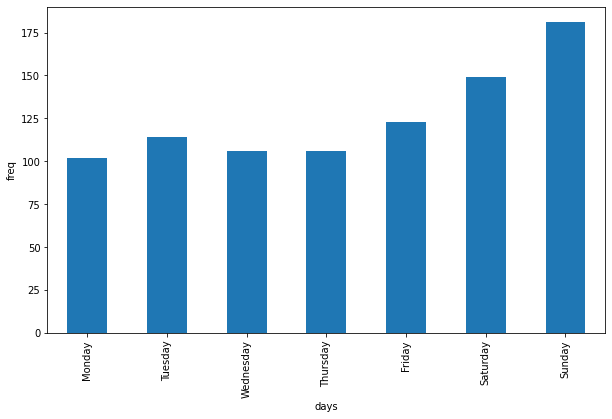

In [13]:
# Data grouping based on days of the period.

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.groupby(['days']).size().reindex(days).plot(kind='bar', figsize = (10,6), ylabel='freq')

### terlihat frekuensi order paling banyak terjadi di hari libur dan sehari sebelum libur (jumat), which is obvious ^^

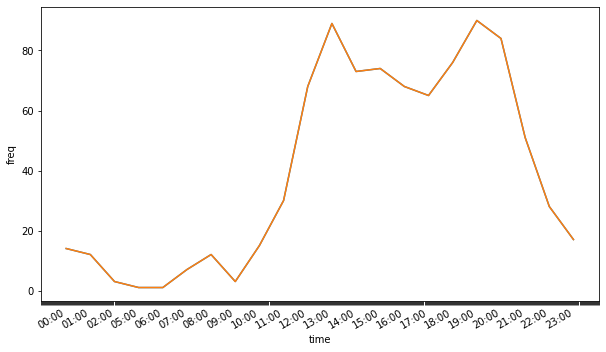

In [14]:
# Data grouping based on time of the period. (cumulative)

hm = df.groupby(['time']).size()

fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)

ax.plot(hm.index, hm.values)
hm.plot(ax = ax, x_compat=True, figsize = (10,6), ylabel='freq')
ax.xaxis.set_major_locator(hours)

fig.autofmt_xdate()
plt.show()

### terlihat ada gap pada jam 2-5 pagi, mengisyaratkan bahwa pengguna tidak dapat membuat order makanan pada waktu tersebut dikarenakan server masih dalam keadaan downtime (semacam waktu tidur server).

<AxesSubplot:xlabel='time', ylabel='freq'>

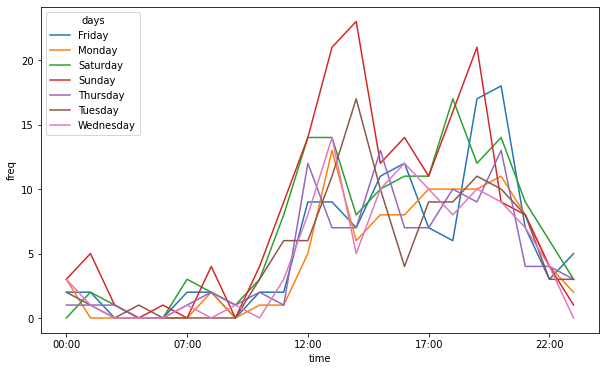

In [15]:
# Data grouping based on time of the days of the period.

group_days = df.groupby(['days', 'time']).size().unstack(level=0, fill_value=0)
group_days.plot(figsize=(10,6), ylabel='freq')

### terlihat frekuensi order paling banyak terjadi saat jam makan siang, dan jam pulang kantor.

<ipython-input-16-5ce8a84cfc78>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(days)


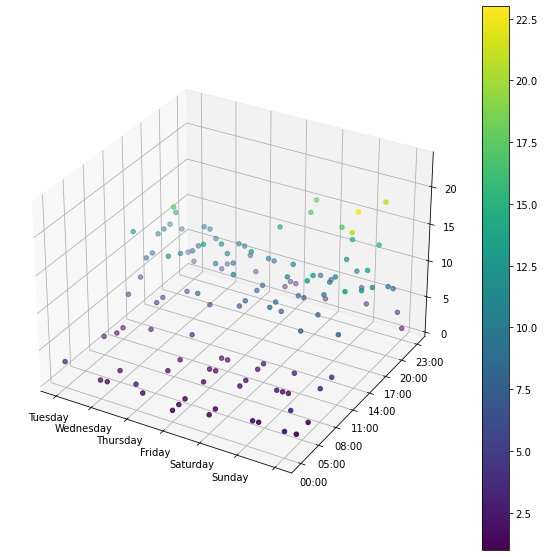

In [16]:
# Data visualization in 3d with frequencies as z.

fig = plt.figure('scatter dates', figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

grp_days = df.groupby(['days', 'time'], as_index=False).size()
time = grp_days['time'].unique()
time.sort()

grp_days['time'] = grp_days['time'].replace(time, [i for i in range(len(time))])
grp_days['days'] = grp_days['days'].replace(days, [i for i in range(len(days))])

x = grp_days['days']
y = grp_days['time']
z = grp_days['size']

plot = ax.scatter(x, y, z, c=z)
fig.colorbar(plot)

ax.xaxis.set_ticklabels(days)
ax.set_yticks([i for i in range(0,len(time),3)])
ax.yaxis.set_ticklabels([time[i] for i in range(0,len(time),3)])

plt.show()

In [30]:
grp = df.groupby(['days', 'time']).size()
print('Maximum frequencies occured in %s at %s for %i occurences' % (grp.idxmax()[0], grp.idxmax()[1], grp.max()))


Maximum frequencies occured in Sunday at 14:00 for 23 occurences


### Dari sini dapat disimpulkan bahwa, frekuensi order paling banyak terjadi pada hari minggu pukul 2 siang sebanyak 23 orderan.